<a href="https://colab.research.google.com/github/LarrySerratos/CienciaMatematicadeDatos/blob/main/ProyectoD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**USA Real Estate Dataset Analisis**



Me interesa encontrar los mejores predictores del precio.

Empezamos cargando la base de datos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Nombre del archivo CSV
nombre_archivo = "realtordata.csv"

print("Loading..")

try:
    # Lee el archivo CSV en un DataFrame de pandas
    df = pd.read_csv(nombre_archivo)
    print("It Works!")
    # Haz algo con los datos, por ejemplo, imprime las primeras filas
    print(df.head())

except FileNotFoundError:
    print(f"El archivo {nombre_archivo} no se encontró en la carpeta actual.")
except Exception as e:
    print("Ocurrió un error:", e)


Loading..
It Works!
     status  bed  bath  acre_lot        city        state  zip_code  \
0  for_sale  3.0   2.0      0.12    Adjuntas  Puerto Rico     601.0   
1  for_sale  4.0   2.0      0.08    Adjuntas  Puerto Rico     601.0   
2  for_sale  2.0   1.0      0.15  Juana Diaz  Puerto Rico     795.0   
3  for_sale  4.0   2.0      0.10       Ponce  Puerto Rico     731.0   
4  for_sale  6.0   2.0      0.05    Mayaguez  Puerto Rico     680.0   

   house_size prev_sold_date     price  
0       920.0            NaN  105000.0  
1      1527.0            NaN   80000.0  
2       748.0            NaN   67000.0  
3      1800.0            NaN  145000.0  
4         NaN            NaN   65000.0  


In [ ]:
from tabulate import tabulate
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═══════╤════════╤════════════╤════════════╤═════════════╤════════════╤══════════════╤══════════════════╤═════════╕
│    │ status   │   bed │   bath │   acre_lot │ city       │ state       │   zip_code │   house_size │   prev_sold_date │   price │
╞════╪══════════╪═══════╪════════╪════════════╪════════════╪═════════════╪════════════╪══════════════╪══════════════════╪═════════╡
│  0 │ for_sale │     3 │      2 │       0.12 │ Adjuntas   │ Puerto Rico │        601 │          920 │              nan │  105000 │
├────┼──────────┼───────┼────────┼────────────┼────────────┼─────────────┼────────────┼──────────────┼──────────────────┼─────────┤
│  1 │ for_sale │     4 │      2 │       0.08 │ Adjuntas   │ Puerto Rico │        601 │         1527 │              nan │   80000 │
├────┼──────────┼───────┼────────┼────────────┼────────────┼─────────────┼────────────┼──────────────┼──────────────────┼─────────┤
│  2 │ for_sale │     2 │      1 │       0.15 │ Juana Diaz │ Puerto Rico │  

In [ ]:
df = pd.read_csv(nombre_archivo)

In [ ]:
estados_unicos = df['state'].unique()
num_estados = len(estados_unicos)
print("Estados diferentes en la columna 'state':")
for estado in estados_unicos:
    print(estado)
print("\nNúmero total de estados:", num_estados)

Estados diferentes en la columna 'state':
Puerto Rico
Virgin Islands
Massachusetts
Connecticut
New Hampshire
Vermont
New Jersey
New York
South Carolina
Tennessee
Rhode Island
Virginia
Wyoming
Maine
Georgia
Pennsylvania
West Virginia
Delaware
Louisiana
Ohio
California
Colorado
Maryland
Missouri
District of Columbia
Wisconsin
North Carolina
Kentucky
Michigan
Mississippi
Florida
Alabama
New Brunswick

Número total de estados: 33


 Me interesa solo elegir un estado y concentrarme en ese. Voy a elegir el que mayor casos tenga.

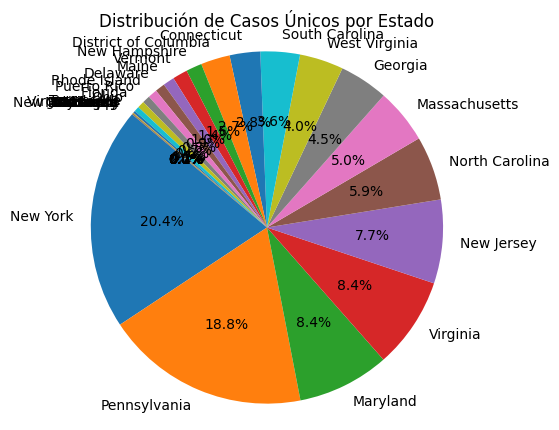

In [ ]:
import matplotlib.pyplot as plt
state_counts = df['state'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Casos Únicos por Estado')
plt.axis('equal')
plt.show()

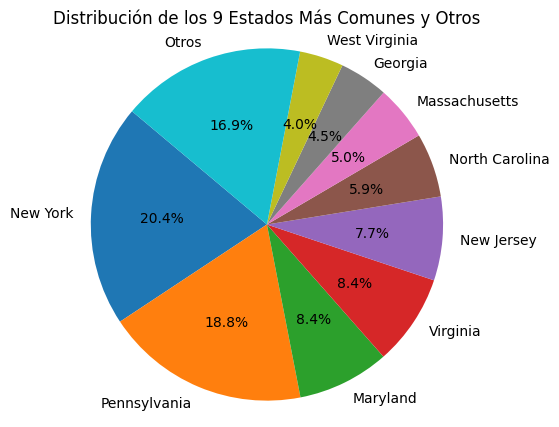

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
state_counts = df['state'].value_counts()
top_10_states = state_counts.head(9)
otros_states_count = state_counts[9:].sum()
top_states_df = top_10_states.to_frame().reset_index()
top_states_df.columns = ['state', 'count']
top_states_df.loc[len(top_states_df)] = ['Otros', otros_states_count]
plt.figure(figsize=(5, 5))
plt.pie(top_states_df['count'], labels=top_states_df['state'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los 9 Estados Más Comunes y Otros')
plt.axis('equal')
plt.show()

In [ ]:
df.duplicated().sum()

3096565

In [ ]:
df.shape[0]

3520686

In [ ]:
dfr = df.drop_duplicates()

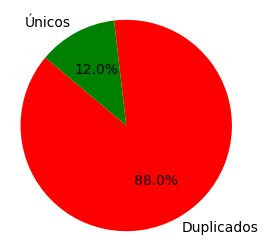

In [ ]:


renglones_duplicados = df[df.duplicated()]
num_renglones_duplicados = len(renglones_duplicados)
porcentaje_renglones_duplicados = (num_renglones_duplicados / len(df)) * 100

porcentaje_renglones_unicos = 100 - porcentaje_renglones_duplicados


labels = ['Duplicados', 'Únicos']

sizes = [porcentaje_renglones_duplicados, porcentaje_renglones_unicos]
colors = ['red', 'green']
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
#plt.title('Porcentaje de Renglones Duplicados vs Únicos')
plt.axis('equal')
plt.show()

In [ ]:
dfr.shape[0] #numero de renglones

424121

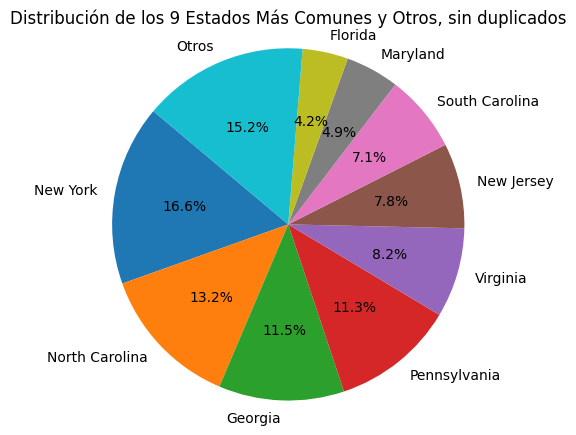

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
state_counts = dfr['state'].value_counts()
top_10_states = state_counts.head(9)
otros_states_count = state_counts[9:].sum()
top_states_df = top_10_states.to_frame().reset_index()
top_states_df.columns = ['state', 'count']
top_states_df.loc[len(top_states_df)] = ['Otros', otros_states_count]
plt.figure(figsize=(5, 5))
plt.pie(top_states_df['count'], labels=top_states_df['state'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de los 9 Estados Más Comunes y Otros, sin duplicados')
plt.axis('equal')
plt.show()

In [ ]:

# Encuentra el estado que más se repite y cuántas veces ocurre
estado_mas_comun = df['state'].value_counts().idxmax()
repeticiones = df['state'].value_counts().max()

    # Imprime el estado que más se repite y el número de repeticiones
print("Estado que más se repite:", estado_mas_comun)
print("Número de repeticiones:", repeticiones)


Estado que más se repite: New York
Número de repeticiones: 718602


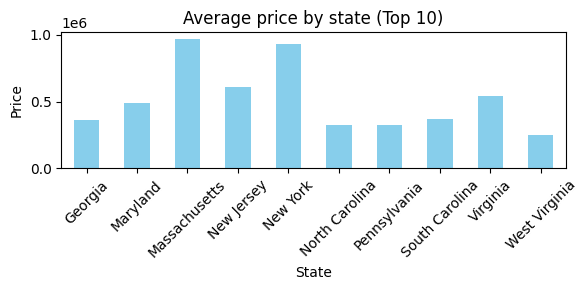

In [ ]:
top_10_cities = df['state'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 ciudades principales
df_top_10 = df[df['state'].isin(top_10_cities)]

# Calcular el precio promedio para cada ciudad
average_prices = df_top_10.groupby('state')['price'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(6, 3))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average price by state (Top 10)')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

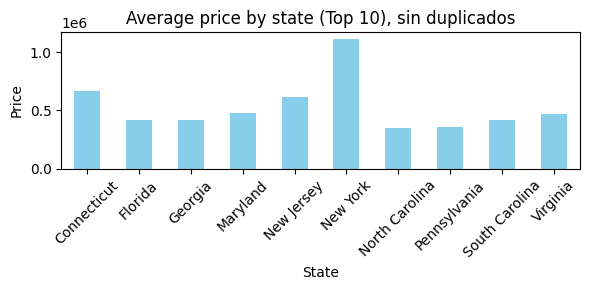

In [ ]:
top_10_cities = dfr['state'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 ciudades principales
df_top_10 = dfr[dfr['state'].isin(top_10_cities)]

# Calcular el precio promedio para cada ciudad
average_prices = df_top_10.groupby('state')['price'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(6, 3))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average price by state (Top 10), sin duplicados')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vamos a eliminar los duplicados. para seguir trabajando

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape[0] #numero de renglones

424121

Continuando con el tratamiento de los datos, me interesa ver los Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424121 entries, 0 to 3520685
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          424121 non-null  object 
 1   bed             316131 non-null  float64
 2   bath            311136 non-null  float64
 3   acre_lot        347219 non-null  float64
 4   city            424010 non-null  object 
 5   state           424121 non-null  object 
 6   zip_code        424042 non-null  float64
 7   house_size      273997 non-null  float64
 8   prev_sold_date  210440 non-null  object 
 9   price           423755 non-null  float64
dtypes: float64(6), object(4)
memory usage: 35.6+ MB


In [ ]:
df.describe().round(2)

,bed,bath,acre_lot,zip_code,house_size,price
count,316131.00,311136.00,347219.00,424042.00,273997.00,4.237550e+05
mean,3.40,2.61,19.34,20151.02,2233.69,5.694622e+05
std,1.59,1.48,908.90,9602.67,19497.46,3.862889e+06
min,1.00,1.00,0.00,0.00,4.00,0.000000e+00
25%,3.00,2.00,0.17,11415.00,1314.00,1.570000e+05
50%,3.00,2.00,0.43,21075.00,1833.00,3.250000e+05
75%,4.00,3.00,1.45,28792.00,2576.00,5.600000e+05
max,210.00,198.00,100000.00,99999.00,9842382.00,2.147484e+09


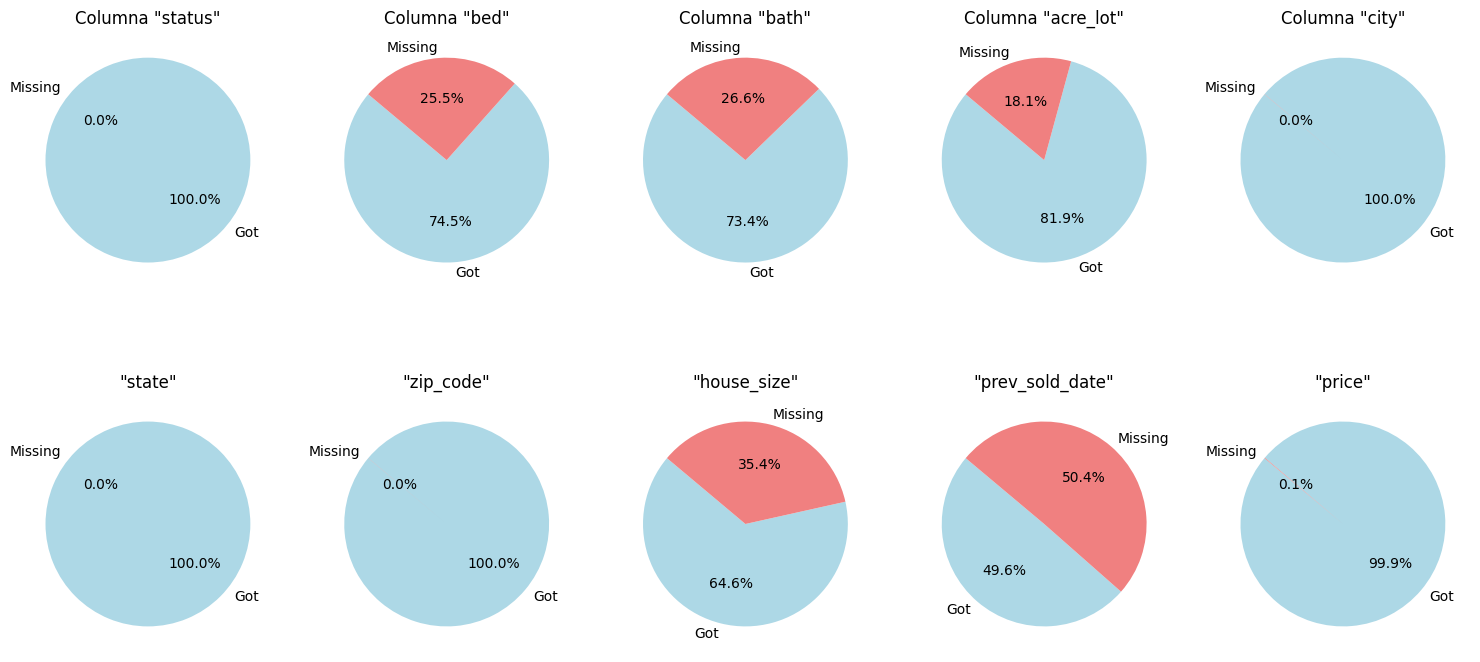

In [ ]:

porcentaje_valores_faltantes = (df.isnull().mean() * 100).round(2)

num_columnas = len(df.columns)
mitad_columnas = num_columnas // 2
columnas_arriba = list(porcentaje_valores_faltantes.index[:mitad_columnas])
columnas_abajo = list(porcentaje_valores_faltantes.index[mitad_columnas:])

fig, axs = plt.subplots(2, mitad_columnas, figsize=(15, 8))

for i, columna in enumerate(columnas_arriba):
    porcentaje = porcentaje_valores_faltantes[columna]
    fila_actual = 0
    columna_actual = i
    labels = ['Got', 'Missing']
    sizes = [100 - porcentaje, porcentaje]
    colors = ['lightblue', 'lightcoral']
    axs[fila_actual, columna_actual].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[fila_actual, columna_actual].set_title(f'Columna "{columna}"')

for i, columna in enumerate(columnas_abajo):
    porcentaje = porcentaje_valores_faltantes[columna]
    fila_actual = 1
    columna_actual = i
    labels = ['Got', 'Missing']
    sizes = [100 - porcentaje, porcentaje]
    colors = ['lightblue', 'lightcoral']
    axs[fila_actual, columna_actual].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[fila_actual, columna_actual].set_title(f'"{columna}"')

# Ajustar el espacio entre subgráficos
plt.tight_layout()
plt.show()


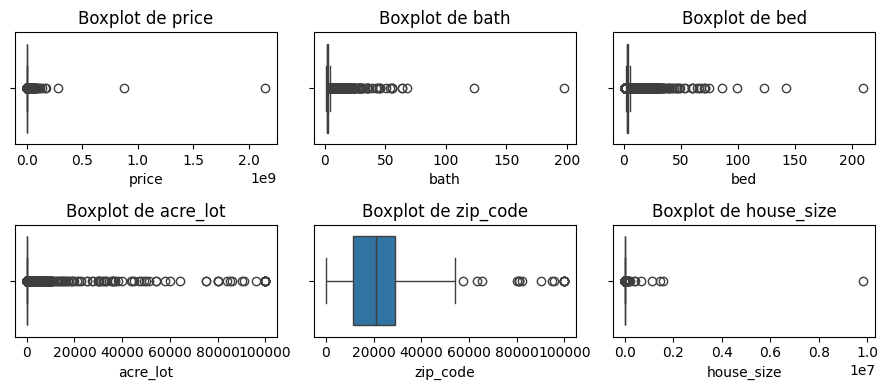

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

columnas = ['price', 'bath', 'bed', 'acre_lot', 'zip_code', 'house_size']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 4))

for i, columna in enumerate(columnas):
    sns.boxplot(x=df[columna], ax=axs[i//3, i%3])
    axs[i//3, i%3].set_title(f'Boxplot de {columna}')

plt.tight_layout()

plt.show()


In [ ]:
#Eliminar precios arriba de 0.5*10^8
df.drop(df[df['price'] > 0.5e8].index, inplace=True)

# Eliminar las filas con más de 100 baños
df.drop(df[df['bath'] > 100].index, inplace=True)

# Eliminar las filas con más de 100 camas
df.drop(df[df['bed'] > 100].index, inplace=True)

# Eliminar las filas con tamaño de casa superior a 0.2e7
df.drop(df[df['house_size'] > 0.2e7].index, inplace=True)

# Eliminar las filas con codigo postal superior a 50000
df.drop(df[df['zip_code'] > 50000].index, inplace=True)

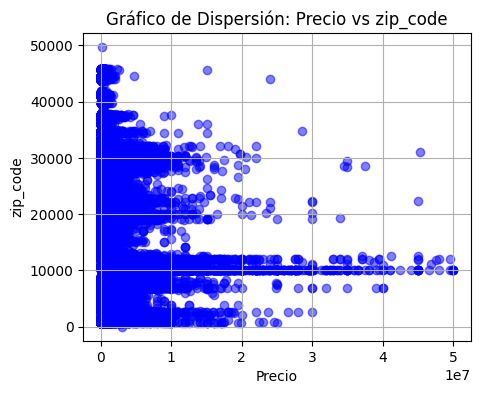

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))

plt.scatter(df['price'], df['zip_code'], color='blue', alpha=0.5)

plt.title('Gráfico de Dispersión: Precio vs zip_code')
plt.xlabel('Precio')
plt.ylabel('zip_code')

# Mostrar el gráfico
plt.grid(True)
plt.show()

Que ciudades estan en la region 9mil a 14mil de zip code?

In [ ]:
# Suponiendo que 'df' es tu DataFrame

# Filtrar el DataFrame para obtener las filas con códigos postales entre 9000 y 14000
zip_code_range = df[(df['zip_code'] >= 9000) & (df['zip_code'] <= 14000)]

# Obtener los estados correspondientes a las filas dentro del rango de códigos postales
estados_entre_9mil_14mil = zip_code_range['state'].unique()

# Mostrar los estados
print("Estados con códigos postales entre 9000 y 14000:")
print(estados_entre_9mil_14mil)




Estados con códigos postales entre 9000 y 14000:
['New York' 'New Jersey' 'Pennsylvania']


In [ ]:

avg_price_by_zip = df.groupby('zip_code')['price'].mean().reset_index()

zip_code_city_state = df[['zip_code', 'city', 'state']].drop_duplicates()

top_5_expensive_zip_with_city_state = pd.merge(avg_price_by_zip, zip_code_city_state, on='zip_code')

top_5_expensive_zip_with_city_state = top_5_expensive_zip_with_city_state.sort_values(by='price', ascending=False).head(5)

print("Los 5 códigos postales más caros con sus respectivas ciudades, estados y precios promedio:")
print(top_5_expensive_zip_with_city_state)


Los 5 códigos postales más caros con sus respectivas ciudades, estados y precios promedio:
      zip_code         price            city          state
4105   10985.0  3.000000e+07  Thompson Ridge       New York
791     2672.0  1.810000e+07      Barnstable  Massachusetts
2453    6753.0  1.333000e+07        Cornwall    Connecticut
4821   11962.0  1.291905e+07      Sagaponack       New York
717     2543.0  1.230000e+07      Woods Hole  Massachusetts


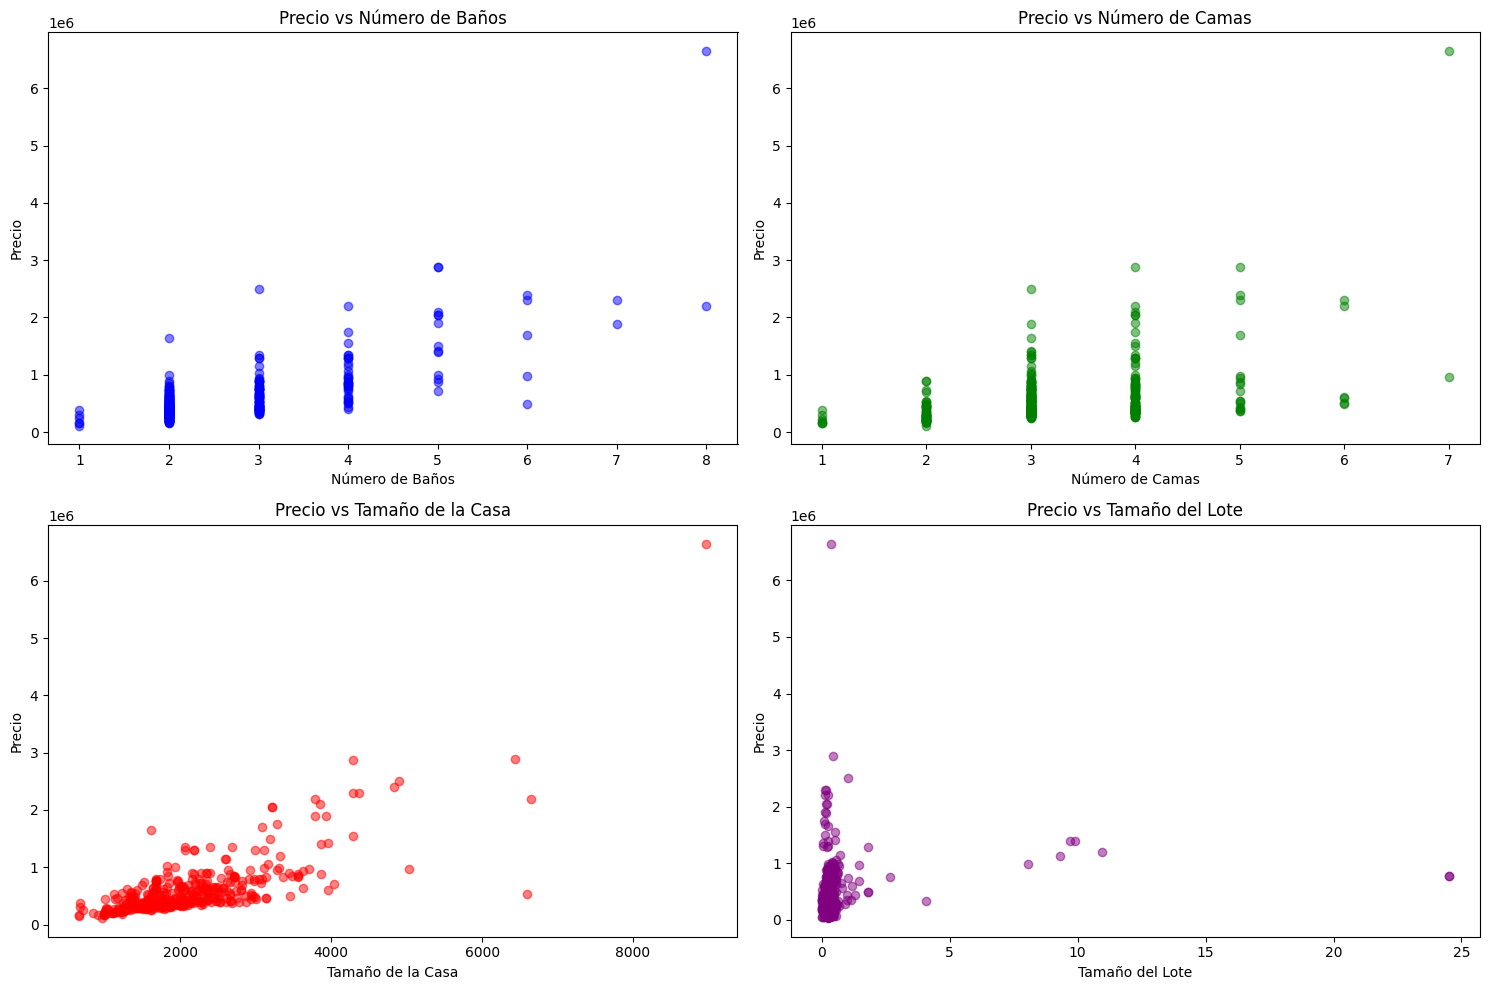

In [ ]:
import matplotlib.pyplot as plt

# Encuentra el código postal más popular
zip_code_mas_popular = df['zip_code'].value_counts().idxmax()

# Filtra el DataFrame para incluir solo las filas correspondientes al código postal más popular
df_zip_code_mas_popular = df[df['zip_code'] == zip_code_mas_popular]

# Configurar el tamaño de la figura y los subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Graficar 'price' vs 'bath'
axs[0, 0].scatter(df_zip_code_mas_popular['bath'], df_zip_code_mas_popular['price'], color='blue', alpha=0.5)
axs[0, 0].set_title('Precio vs Número de Baños')
axs[0, 0].set_xlabel('Número de Baños')
axs[0, 0].set_ylabel('Precio')

# Graficar 'price' vs 'bed'
axs[0, 1].scatter(df_zip_code_mas_popular['bed'], df_zip_code_mas_popular['price'], color='green', alpha=0.5)
axs[0, 1].set_title('Precio vs Número de Camas')
axs[0, 1].set_xlabel('Número de Camas')
axs[0, 1].set_ylabel('Precio')

# Graficar 'price' vs 'house_size'
axs[1, 0].scatter(df_zip_code_mas_popular['house_size'], df_zip_code_mas_popular['price'], color='red', alpha=0.5)
axs[1, 0].set_title('Precio vs Tamaño de la Casa')
axs[1, 0].set_xlabel('Tamaño de la Casa')
axs[1, 0].set_ylabel('Precio')

# Graficar 'price' vs 'acre_lot'
axs[1, 1].scatter(df_zip_code_mas_popular['acre_lot'], df_zip_code_mas_popular['price'], color='purple', alpha=0.5)
axs[1, 1].set_title('Precio vs Tamaño del Lote')
axs[1, 1].set_xlabel('Tamaño del Lote')
axs[1, 1].set_ylabel('Precio')

# Ajustar espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



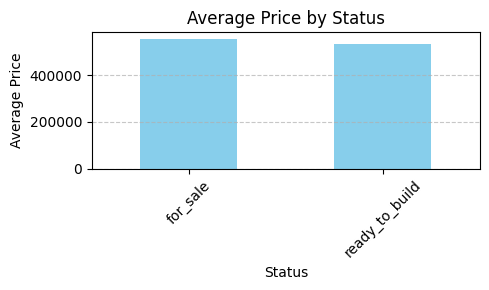

In [ ]:
import matplotlib.pyplot as plt

# Group by 'status' and calculate the average price for each group
avg_price_by_status = df.groupby('status')['price'].mean()

# Plot the average price for each status in a bar graph
plt.figure(figsize=(5, 3))
avg_price_by_status.plot(kind='bar', color='skyblue')
plt.title('Average Price by Status')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()


In [ ]:
# Paso 1: Filtrar el DataFrame para incluir solo las filas donde el estado es 'for_sale'
df_for_sale = df[df['status'] == 'for_sale']

# Paso 2: Contar el número de propiedades en estado de venta por ciudad
count_for_sale_by_city = df_for_sale.groupby('city').size().reset_index(name='count_for_sale')

# Paso 3: Filtrar el DataFrame original para incluir solo las filas donde el estado no es 'for_sale'
df_not_for_sale = df[df['status'] != 'for_sale']

# Paso 4: Contar el número de propiedades en otros estados por ciudad
count_not_for_sale_by_city = df_not_for_sale.groupby('city').size().reset_index(name='count_not_for_sale')

# Paso 5: Combinar los resultados de los pasos 2 y 4 en un solo DataFrame
combined_counts_by_city = pd.merge(count_for_sale_by_city, count_not_for_sale_by_city, on='city')

# Paso 6: Calcular el porcentaje de propiedades en estado de venta y otro estado para cada ciudad
combined_counts_by_city['percent_for_sale'] = (combined_counts_by_city['count_for_sale'] /
                                               (combined_counts_by_city['count_for_sale'] + combined_counts_by_city['count_not_for_sale'])) * 100
combined_counts_by_city['percent_not_for_sale'] = 100 - combined_counts_by_city['percent_for_sale']

# Paso 7: Encontrar la ciudad donde el porcentaje de propiedades en estado de venta está más cerca del 50%
city_closest_to_50_percent = combined_counts_by_city.loc[
    (combined_counts_by_city['percent_for_sale'] >= 45) &
    (combined_counts_by_city['percent_for_sale'] <= 55)
]

print(city_closest_to_50_percent)



          city  count_for_sale  count_not_for_sale  percent_for_sale  \
231   New Hill               8                   9         47.058824   
304  Stallings               4                   4         50.000000   
320     Trappe              38                  33         53.521127   

     percent_not_for_sale  
231             52.941176  
304             50.000000  
320             46.478873  


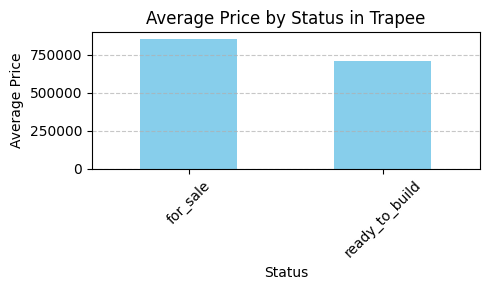

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where the city is 'Trapee'
df_trapee = df[df['city'] == 'Trappe']

# Group by 'status' and calculate the average price for each group
avg_price_by_status_trapee = df_trapee.groupby('status')['price'].mean()

# Plot the average price for each status in a bar graph
plt.figure(figsize=(5, 3))
avg_price_by_status_trapee.plot(kind='bar', color='skyblue')
plt.title('Average Price by Status in Trapee')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()
plt.show()


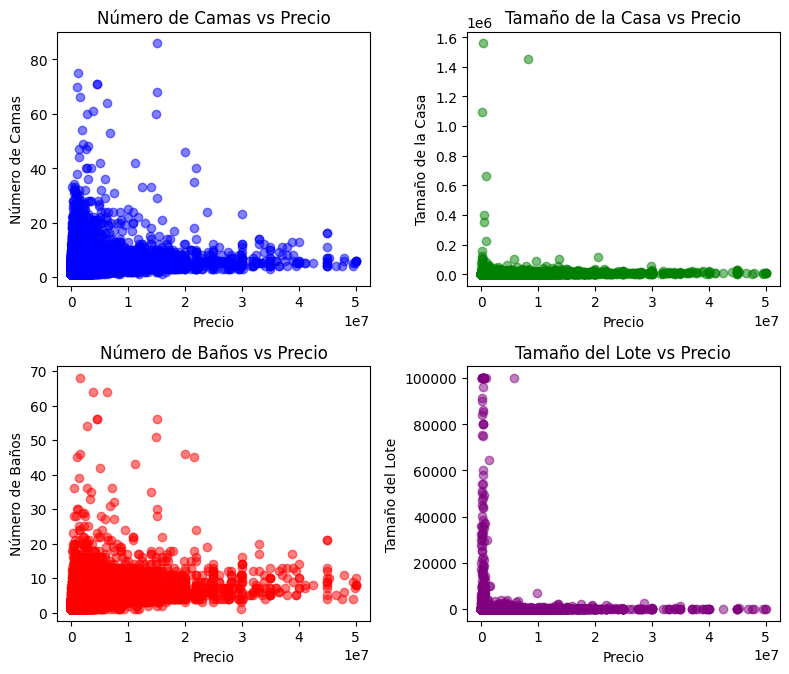

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame

# Configurar el tamaño de la figura y el número de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

# Graficar 'bed' vs 'price'
axs[0, 0].scatter(df['price'], df['bed'], color='blue', alpha=0.5)
axs[0, 0].set_title('Número de Camas vs Precio')
axs[0, 0].set_xlabel('Precio')
axs[0, 0].set_ylabel('Número de Camas')

# Graficar 'house_size' vs 'price'
axs[0, 1].scatter(df['price'], df['house_size'], color='green', alpha=0.5)
axs[0, 1].set_title('Tamaño de la Casa vs Precio')
axs[0, 1].set_xlabel('Precio')
axs[0, 1].set_ylabel('Tamaño de la Casa')

# Graficar 'bath' vs 'price'
axs[1, 0].scatter(df['price'], df['bath'], color='red', alpha=0.5)
axs[1, 0].set_title('Número de Baños vs Precio')
axs[1, 0].set_xlabel('Precio')
axs[1, 0].set_ylabel('Número de Baños')

# Graficar 'acre_lot' vs 'price'
axs[1, 1].scatter(df['price'], df['acre_lot'], color='purple', alpha=0.5)
axs[1, 1].set_title('Tamaño del Lote vs Precio')
axs[1, 1].set_xlabel('Precio')
axs[1, 1].set_ylabel('Tamaño del Lote')

# Ajustar espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Voy a hacer un nuevo conjunto usando solo zip_code del 9mil al 14mil (Zona cara que incluye los estados (['New York' 'New Jersey' 'Pennsylvania']))

In [ ]:

df2 = df[(df['zip_code'] >= 9000) & (df['zip_code'] <= 14000)]


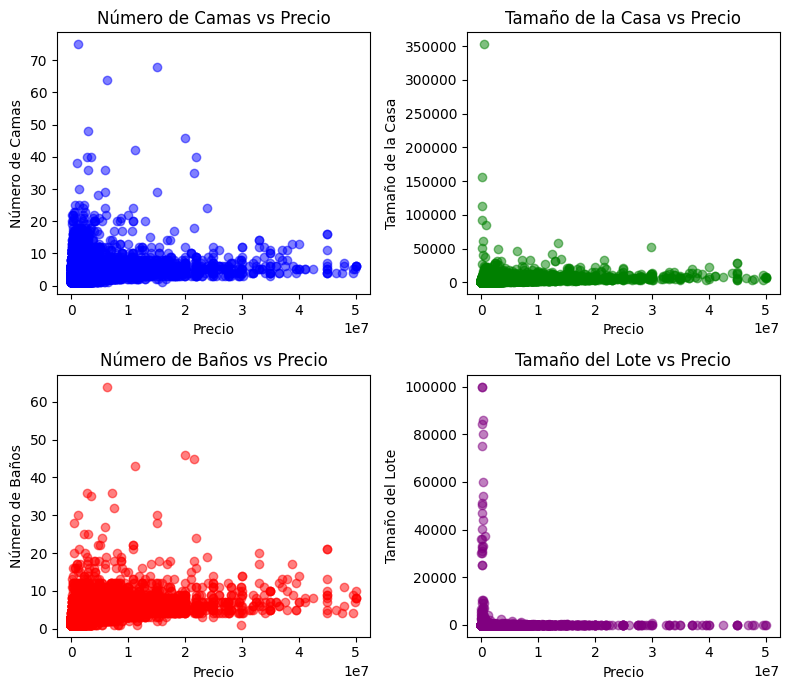

In [ ]:
# Configurar el tamaño de la figura y el número de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 7))

# Graficar 'bed' vs 'price'
axs[0, 0].scatter(df2['price'], df2['bed'], color='blue', alpha=0.5)
axs[0, 0].set_title('Número de Camas vs Precio')
axs[0, 0].set_xlabel('Precio')
axs[0, 0].set_ylabel('Número de Camas')

# Graficar 'house_size' vs 'price'
axs[0, 1].scatter(df2['price'], df2['house_size'], color='green', alpha=0.5)
axs[0, 1].set_title('Tamaño de la Casa vs Precio')
axs[0, 1].set_xlabel('Precio')
axs[0, 1].set_ylabel('Tamaño de la Casa')

# Graficar 'bath' vs 'price'
axs[1, 0].scatter(df2['price'], df2['bath'], color='red', alpha=0.5)
axs[1, 0].set_title('Número de Baños vs Precio')
axs[1, 0].set_xlabel('Precio')
axs[1, 0].set_ylabel('Número de Baños')

# Graficar 'acre_lot' vs 'price'
axs[1, 1].scatter(df2['price'], df2['acre_lot'], color='purple', alpha=0.5)
axs[1, 1].set_title('Tamaño del Lote vs Precio')
axs[1, 1].set_xlabel('Precio')
axs[1, 1].set_ylabel('Tamaño del Lote')

# Ajustar espacios entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
grouped_prices = df.groupby('state')['price'].agg(['mean'])

# Encuentra el valor mínimo y máximo de los promedios
min_price_state = grouped_prices.idxmin()['mean']
max_price_state = grouped_prices.idxmax()['mean']

# Obtiene los precios correspondientes a los estados con precio promedio más bajo y más alto
min_price = df.loc[df['state'] == min_price_state, 'price'].mean()
max_price = df.loc[df['state'] == max_price_state, 'price'].mean()

# Imprime el estado con el precio promedio más bajo, su respectivo precio y el estado con el precio promedio más alto y su respectivo precio
print("Estado con el precio promedio más bajo:", min_price_state, "Precio promedio:", min_price)
print("Estado con el precio promedio más alto:", max_price_state, "Precio promedio:", max_price)


Estado con el precio promedio más bajo: New Brunswick Precio promedio: 2500.0
Estado con el precio promedio más alto: California Precio promedio: 1075241823.5


Me sirve, la cantidad de datos es mucho menor pero aun mayor de la recomendada dejando margen para otros filtros.

Voy a hacer el nuevo conjunto usando solo los datos de New York.

In [ ]:
df_ny = df.loc[df['state'] == 'New York']
print(df_ny.head())

         status  bed  bath  acre_lot       city     state  zip_code  \
30149  for_sale  3.0   1.0     60.00     Berlin  New York   12022.0   
54248  for_sale  3.0   2.0      2.02  Claverack  New York   12521.0   
54258  for_sale  4.0   2.0      0.24     Copake  New York   12521.0   
54259  for_sale  3.0   3.0      1.90     Copake  New York   12516.0   
54262  for_sale  3.0   2.0      2.00     Copake  New York   12517.0   

       house_size prev_sold_date     price  
30149      1176.0            NaN  175000.0  
54248      1600.0     2021-11-24  425000.0  
54258      1239.0     2018-02-01  225000.0  
54259      1800.0            NaN  419000.0  
54262      1482.0            NaN  365000.0  


La columna "prev_sold_date" no me parece muy relevante para mi objetivo y ademas le faltan muchos datos. Hay que ver que onda.

In [ ]:
porcentaje_valores_faltantes = (df_ny['prev_sold_date'].isnull().sum() / len(df_ny)) * 100
print("Porcentaje de valores faltantes en 'prev_sold_date' (New York): {:.2f}%".format(porcentaje_valores_faltantes))

Porcentaje de valores faltantes en 'prev_sold_date' (New York): 45.84%


vaya, son muchos los que faltan, La dejaremos por ahora, se me ocurre que el valor de la casa podria verse relacionado con la antiguedad que el properiario tiene ahí, ya lo descubriremos.

Ahora hay que filtrar los datos para eliminar Outliers y espacios vacios

Primero a eliminar los duplicados

In [ ]:
df_ny.duplicated().sum()

648361

In [ ]:
df_ny.duplicated().sum()
df_ny2 = df_ny.drop_duplicates()

In [ ]:
len(df_ny2)

70241

Nos quedaron muy pocos datos, esta base de datos tiene muchos duplicados, muchos se repiten mas de 2 veces

In [ ]:
# Contar valores faltantes en cada columna
missing_values = df_ny2.isna().sum()

# Mostrar el resultado
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
status                0
bed               12293
bath               9882
acre_lot          22635
city                 13
state                 0
zip_code             17
house_size        23355
prev_sold_date    34010
price                 2
dtype: int64


In [ ]:
df_ny3 = df_ny2.dropna()

In [ ]:
len(df_ny3)

18974

In [ ]:
num_cities = df_ny['city'].nunique()
print("Número de ciudades únicas:", num_cities)

Número de ciudades únicas: 1746


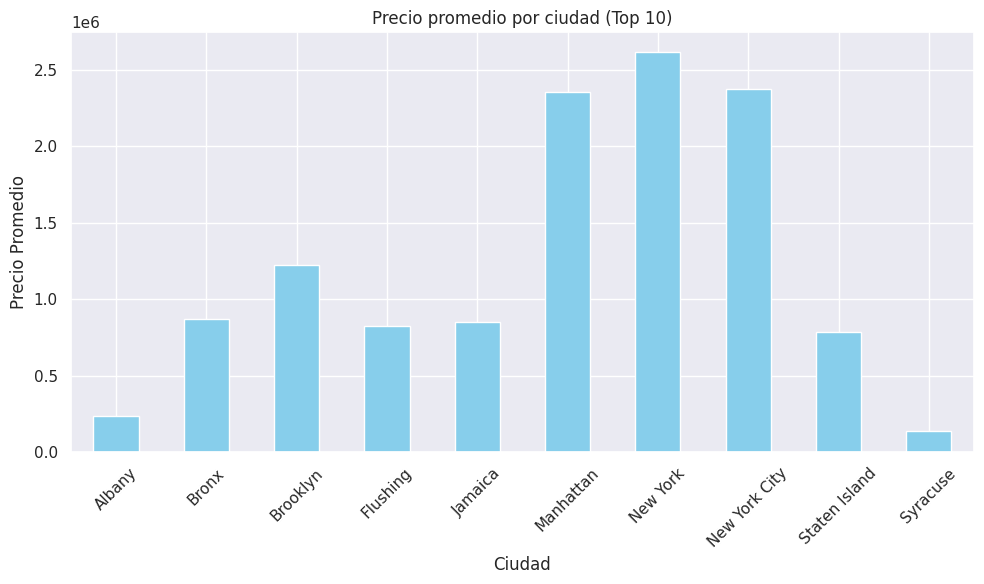

In [ ]:
top_10_cities = df_ny['city'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo las filas correspondientes a las 10 ciudades principales
df_top_10 = df_ny[df_ny['city'].isin(top_10_cities)]

# Calcular el precio promedio para cada ciudad
average_prices = df_top_10.groupby('city')['price'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Precio promedio por ciudad (Top 10)')
plt.xlabel('Ciudad')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()